# Fracture networks as graphs

### Import packages

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as st
import pickle
import karstnet as kn

## Creating a graph from the fracture network 

In [2]:
# Read the graphs
G = pickle.load(open(f'data/graphs/tsan_fracgraph.pickle', 'rb'))

## Topological Analyses

### Using karstnet to analyze statistics and generate a simplified graph

In [4]:
tsan = kn.from_nxGraph(G,dict(G.nodes('pos')), properties=dict(G.nodes('family')), verbose=True)


 This network contains  125  connected components



In [5]:
results = tsan.characterize_graph( verbose=True )

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 101.886
                 cv length = 0.925
            length entropy = 0.406
                tortuosity = 1.024
       orientation entropy = 0.913
                      aspl = 21.454
                       cpd = 0.256
               mean degree = 2.155
                 cv degree = 0.571
 correlation vertex degree = 0.004
--------------------------------------


In [6]:
tsan.basic_analysis()


 This network contains :
 2785  nodes (stations) and  2914  edges.
  On the simplified graph, there are :  1667  nodes (stations) and  1796  edges,
 843  are extremity nodes (entries or exits) and  818  are junction nodes.
There is/are  125  connected component.s and  254  cycle.s.


Howard's parameter are (Howard, 1970) :  
 alpha:  0.07629918894562931 
 beta 1.077384523095381 
 gamma 0.35955955955955954

Note that this computation considers the node of degree 2  necessary to loop preservations as Seed Nodes, in order to  stay consistent with Howard's illustrations.


In [7]:
# Compute the number of nodes and edges
nb_nodes = tsan.graph.number_of_nodes()
nb_nodes_simple = tsan.graph_simpl.number_of_nodes()

nb_edges = tsan.graph.number_of_edges()
nb_edges_simple = tsan.graph_simpl.number_of_edges()
print (f'Complete graph, nodes:{nb_nodes}, edges:{nb_edges}\nReduced graph, nodes:{nb_nodes_simple}, edges:{nb_edges_simple}')

Complete graph, nodes:2785, edges:2914
Reduced graph, nodes:1667, edges:1796


In [8]:
print(nb_edges_simple)

1796


In [9]:
# Export karstnet graph to networkx
K = tsan.graph_simpl
nx.set_node_attributes(K, tsan.pos2d, 'pos')
nx.set_node_attributes(K, tsan.properties, 'family')

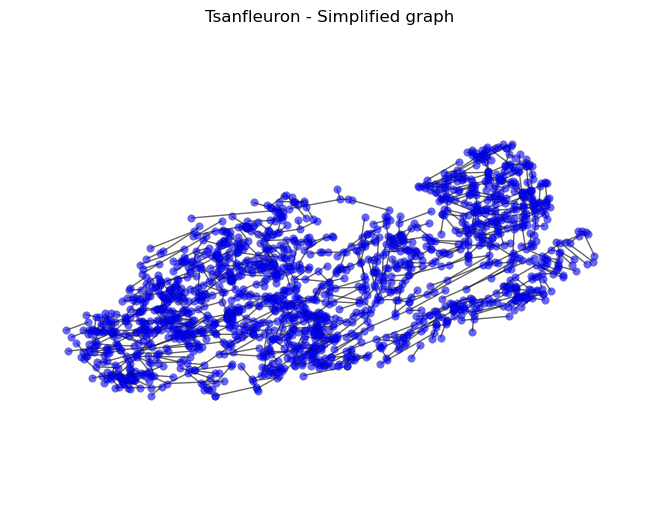

In [11]:
# Plot the fracture network as a simplified graph
kwds = {
    'with_labels': False, 
    'node_shape': 'o',         # node symbol
    'node_color': 'blue',      # node color
    'edgecolors': 'black',     # node border color
    'node_size': 30,            # node size
    'linewidths': 0.2,         # node border width
    'edge_color': 'black',     # edge color
    'width': 1,                # edge width
    'font_size': 8,            # font size
    'font_color': 'black',      # font color
    'alpha': 0.6 ,              # transparency
}

pos = nx.get_node_attributes(K, 'pos')

nx.draw(K, pos=pos, **kwds)
plt.title('Tsanfleuron - Simplified graph')
plt.axis('equal')

plt.savefig('tsangraph_simple.png', transparent=True, dpi=300)
    
plt.show()

### Nodes' degrees calculation

In [12]:
# Calculate degree sequence for simplified karstnet graph
degk = dict(K.degree())
nx.set_node_attributes(K, degk, 'degree')

deg_seqk = list(degk.values())

In [13]:
# Calculate degree sequence for complete graph
deg = dict(G.degree())
nx.set_node_attributes(G, deg, 'degree')

deg_seq = list(deg.values())

In [15]:
data = {1: 714, 3: 262, 4: 188, 5: 81}

expanded_data = []
for value, count in data.items():
    expanded_data.extend([value] * count)

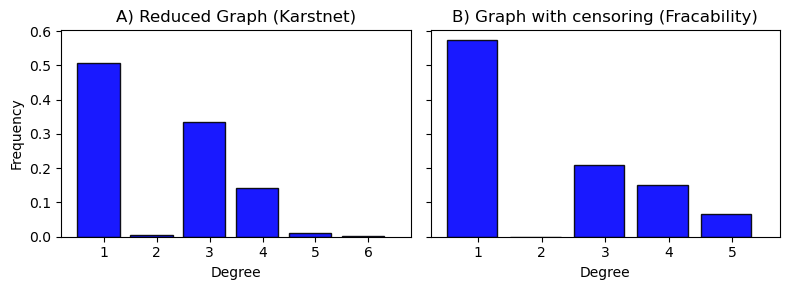

In [16]:
# Plot histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
datasets = [deg_seqk, expanded_data]
titles = ['A) Reduced Graph (Karstnet)', 'B) Graph with censoring (Fracability)']

# Loop through each dataset and corresponding axis
for i, (deg_seq, title) in enumerate(zip(datasets, titles)):
    unique_deg = sorted(set(deg_seq))
    axes[i].hist(deg_seq, bins=range(min(unique_deg), max(unique_deg) + 2),
                 width=0.8, color='b', align='left', density=True, 
                 edgecolor='black', alpha=0.9)
    
    axes[i].set_xlabel('Degree')
    #axes[i].set_xticks(unique_deg)
    axes[i].set_title(title)

axes[0].set_ylabel("Frequency")
plt.tight_layout()

plt.savefig('Degrees.jpg', dpi=200)

plt.show()

## Creating degree node's attribute

In [17]:
for node in K.nodes:
    K.nodes[node]['degree'] = degk[node]

In [18]:
for node in G.nodes:
    G.nodes[node]['degree'] = deg[node]

In [19]:
posk = nx.get_node_attributes(K, 'pos')
pos = nx.get_node_attributes(G, 'pos')

In [20]:
print(G)

Graph with 2785 nodes and 2914 edges


## Exporting

In [26]:
output = f'data/graphs/tsan_fracgraph.pickle'
pickle.dump(G, open(output, 'wb'))

output = f'data/graphs/tsan_simplegraph.pickle'
pickle.dump(K, open(output, 'wb'))